## Imports

In [1]:
import scipy.io
import numpy as np
from sklearn import linear_model 
from scipy import linalg
from sklearn import preprocessing as preproc # load preprocessing function
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
from scipy.stats import linregress
from sklearn.model_selection import KFold
from statsmodels.sandbox.stats.multicomp import multipletests 
import warnings # to silence convergence warnings

# seaborn can be used to "prettify" default matplotlib plots by importing and setting as default
import seaborn as sns
sns.set() # Set searborn as default

## Load dataset

In [2]:
mat = scipy.io.loadmat('sand.mat')

X = mat['X']
y = mat['Y']

[n,p] = X.shape

### 2 Find an elastic net solution for the sand data, with suitable choices of regression parameters using cross validation.

>(a) Use the coordinate descent algorithm.

>>(i) Python: Use Python’s `linear_model.ElasticNet`.

>(b) Investigate how different values of α affects the number of nonzero parameters in the coordinate descent algorithms.
  
>(c) What are the pros and cons of the coordinate descent algorithm compared to using LARS?

Text(0.5, 1.0, 'Crossvalidated MSE of Elastic Net Fit Alpha = 0.00')

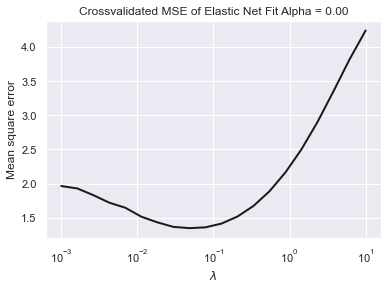

In [3]:
alpha = 0.001
lambdas = np.logspace(-3, 1, num=20)

with warnings.catch_warnings(): # done to disable all the convergence warnings from elastic net
    warnings.simplefilter("ignore")
    
    model = linear_model.ElasticNetCV(cv=5, l1_ratio = alpha, alphas=lambdas, normalize=True).fit(X, y)
    
plt.figure()
plt.semilogx(model.alphas_, model.mse_path_.mean(axis=-1), 'k',label='Average across the folds', linewidth=2)
plt.xlabel(r'$\lambda$')
plt.ylabel('Mean square error')
plt.title('Crossvalidated MSE of Elastic Net Fit Alpha = %.2f' % alpha)

Text(0.5, 1.0, 'Sum of coefficients of Elastic Net Fit Alpha = 0.00')

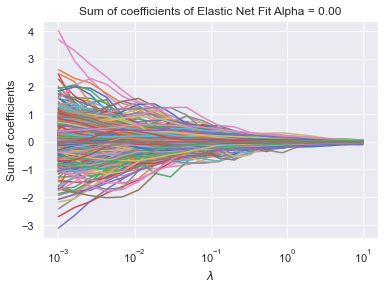

In [4]:
CV = 5
kf = KFold(n_splits=CV)

coefs = np.zeros((CV,len(lambdas),p))

for i, (train_index, test_index) in enumerate(kf.split(X)):
    ytrain = y[train_index].ravel() # ravel collapses the array, ie dim(x,1) to (x,)
    Xtrain = X[train_index]
    
    for j, lambda_ in enumerate(lambdas):
        with warnings.catch_warnings(): # done to disable all the convergence warnings from elastic net
            warnings.simplefilter("ignore")

            model = linear_model.ElasticNet(l1_ratio = alpha, alpha=lambda_, normalize=False).fit(Xtrain, ytrain)
            coefs[i,j,:] = model.coef_
        
trace = np.sum(coefs, axis=0)
plt.figure()
plt.semilogx(lambdas, trace)
plt.xlabel(r'$\lambda$')
plt.ylabel('Sum of coefficients')
plt.title('Sum of coefficients of Elastic Net Fit Alpha = %.2f' % alpha)